<a href="https://colab.research.google.com/github/yadukul/ML-Lab/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg as la
import statistics
import matplotlib.pyplot as plt

A1. Please refer to the “Purchase Data” worksheet of Lab Session1 Data.xlsx. Please load the data
and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following
activities.

In [ ]:
val = pd.read_excel(r"/content/Lab Session1 Data.xlsx",sheet_name='Purchase data')
A = val.iloc[:,1:4].to_numpy()
C = val.iloc[:,4].to_numpy()

What is the dimensionality of the vector space for this data?

In [ ]:

print("The dimension calculated using shape is ", val.shape)

print("The dimension calculated using ndim is ", val.ndim)

The dimension calculated using shape is  (10, 22)
The dimension calculated using ndim is  2


 How many vectors exist in this vector space?

In [ ]:
print("The number of vectors present is ",len(val))

The number of vectors present is  10


What is the rank of Matrix A?

In [ ]:
rankA = la.matrix_rank(A)
print("The rank of matrix A calculated is ",rankA)

The rank of matrix A calculated is  3


Using Pseudo-Inverse find the cost of each product available for sale. or
A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
available with the vendor

In [ ]:
pseudo_inverse = la.pinv(A)

z = np.matmul(pseudo_inverse,C)

print(z)

[ 1. 55. 18.]


A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
purchase behavior.

In [ ]:
val['rich/poor'] = np.where(val['Payment (Rs)'] > 200,'Rich','Poor')
xyz = val.dropna(axis=1,how='any')
print(xyz)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   
5      C_6           22             1                 5           167   
6      C_7           15             4                 2           271   
7      C_8           18             4                 2           274   
8      C_9           21             1                 4           148   
9     C_10           16             2                 4           198   

  rich/poor  
0      Rich  
1      Rich  
2      Rich  
3      Poor  
4      Rich  
5      Poor  
6      Rich  
7      Rich  
8      Poor  
9      Poor  


A4. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the
following after loading the data to your programming platform.


In [ ]:
df = pd.read_excel(r"Lab Session1 Data.xlsx",sheet_name='IRCTC Stock Price')

• Calculate the mean and variance of the Price data present in column D.
(Suggestion: if you use Python, you may use statistics.mean() &
statistics.variance() methods).


In [ ]:
print(df)
mean = statistics.mean(df['Price'])
var = statistics.variance(df['Price'])

print("The mean value of Price column is ", mean , "and the variance value is ", var)

             Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.0020  
3   -0.0026  
4   -

• Select the price data for all Wednesdays and calculate the sample mean. Compare the mean
with the population mean and note your observations.

In [ ]:
wednesday_price_mean = statistics.mean(df['Price'].loc[df['Day']=="Wed"])
print("The mean value of price data for every wednesday is ",wednesday_price_mean)
print("The population mean value is ",mean)
# we observe that the mean decreases as we reduce the size of dataset.


The mean value of price data for every wednesday is  1550.706
The population mean value is  1560.663453815261


• Select the price data for the month of Apr and calculate the sample mean. Compare the
mean with the population mean and note your observations

In [ ]:
april_price_mean = statistics.mean(df['Price'].loc[df['Month']=='Apr'])
print("The mean value of price data for April month is ",april_price_mean)

The mean value of price data for April month is  1698.9526315789474


• From the Chg% (available in column I) find the probability of making a loss over the stock.
(Suggestion: use lambda function to find negative values)

In [ ]:
count_total = df['Chg%'].count()
profit_count = df['Chg%'].loc[df['Chg%']>0].count()
loss_count = df['Chg%'].loc[df['Chg%']<0].count()
print("Probability of Making a Loss is: ", loss_count/count_total)

Probability of Making a Loss is:  0.4979919678714859


• Calculate the probability of making a profit on Wednesday.

In [ ]:
wednesday_count = df['Chg%'].loc[df['Day'] == 'Wed'].count()
profit_count = df['Chg%'].loc[(df['Day'] == 'Wed') & (df['Chg%'] >0)]
loss_count = df['Chg%'].loc[(df['Day'] == 'Wed') & (df['Chg%'] <0)]
loss_count = loss_count.count()
profit_count = profit_count.count()

print("Probability of a Day Being a Wednesday: ",wednesday_count/count_total)

print("Probability of Making a Profit on Wednesday: ",profit_count/count_total)

print("Probability of Making a Loss on Wednesday: ",loss_count/count_total)


Probability of a Day Being a Wednesday:  0.20080321285140562
Probability of Making a Profit on Wednesday:  0.08433734939759036
Probability of Making a Loss on Wednesday:  0.11646586345381527


Calculate the conditional probability of making profit, given that today is Wednesday.

In [ ]:
print("Probability of Making a Profit given that it is Wednesday: ",profit_count/wednesday_count)

Probability of Making a Profit given that it is Wednesday:  0.42


• Make a scatter plot of Chg% data against the day of the week.

Text(0.5, 1.0, 'Days of The Week vs Change %')

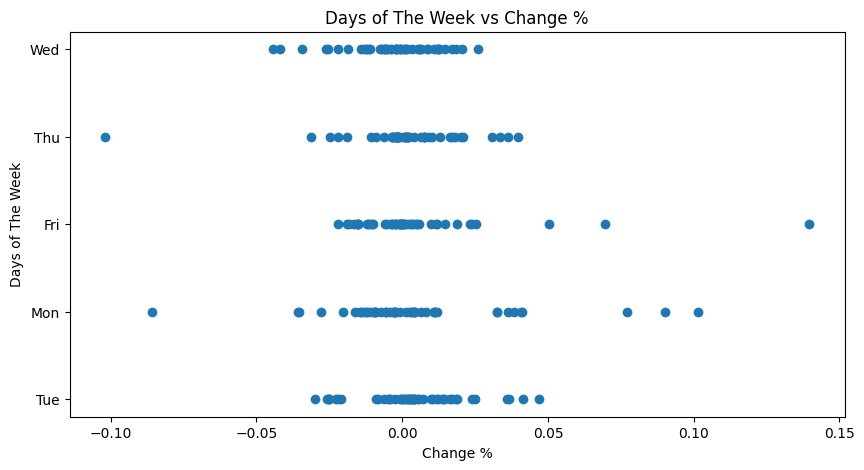

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df['Chg%'], y = df['Day'])
plt.xlabel("Change %")
plt.ylabel("Days of The Week")
plt.title("Days of The Week vs Change %")